In [1]:
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
from ipywidgets import widgets 
from IPython.display import display, clear_output, Image
from plotly.graph_objs import *
from plotly.widgets import GraphWidget
import seaborn as sns


<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

## Fetch Data

In [3]:
sf2017 = pd.read_csv('data/sf2017.csv')

In [4]:
sf2017 = sf2017[sf2017.Salaries > 10000]
sf_bins = np.arange(0, 700000, 25000)

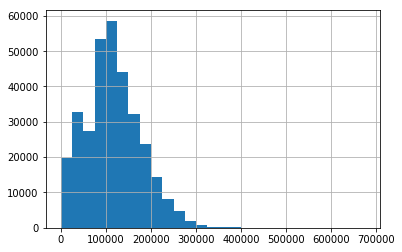

In [5]:
sf2017['Total Compensation'].hist(bins=sf_bins)

## Sampling/Bootstrapping

#### Sample Size: 500

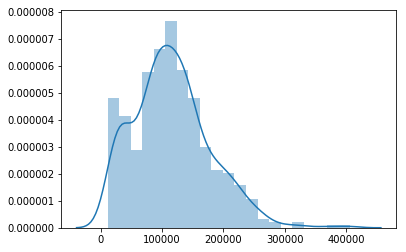

In [6]:
our_sample = np.random.choice(sf2017['Total Compensation'].values, size=500, replace=False)
sns.distplot(our_sample)
# our_sample.select('Total Compensation').hist(bins=sf_bins)

In [7]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    medians = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = np.random.choice(original_sample, size=500)
        resampled_median = np.median(bootstrap_sample)
        medians = np.append(medians, resampled_median)

    return medians

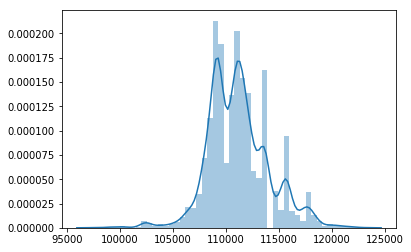

In [8]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 5000)
sns.distplot(bstrap_medians)

## Bootstrap Demo

In [9]:
import plotly

In [22]:
trace1 = {
  "x": sf2017['Total Compensation'].values,
  "opacity": 0.75, 
  "type": "histogram",
  "xbins":dict(
        start=0,
        end=500000,
        size=25000
    )
}
trace2 = {
  "opacity": 0.75, 
  "type": "histogram",
  "xbins":dict(
        start=0,
        end=500000,
        size=25000
    )
}
trace3 = {
  "opacity": 0.75, 
  "type": "histogram",
  "xbins":dict(
        start=0,
        end=500000,
        size=25000
    )
}
data = Data([trace1])
layout = {"barmode": "overlay"}
fig = plotly.tools.make_subplots(rows=1, cols=3)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
plot_url = py.plot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



/Users/calebsiu/Desktop/repos/plotly.py/plotly/plotly/plotly.py:219: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [10]:
g = GraphWidget('https://plot.ly/~calebs11/41/')

In [11]:
style = {'description_width': 'initial'}
original_sample_size_slider = widgets.IntSlider(
    description='Original Sample Size',
    value=500, 
    max=1000, 
    min=1, 
    style=style, 
    continuous_update=False)
resample_size_slider = widgets.IntSlider(
    description='Resample Size',
    value=500, 
    max=1000, 
    min=1, 
    style=style) 

In [16]:
current_sample = np.random.choice(sf2017['Total Compensation'].values, original_sample_size_slider.value, replace=False)
resample_from_sample = np.random.choice(current_sample, size=resample_size_slider.max, replace=True)
def response(change):
    if (change['owner'].description) == 'Original Sample Size':
        global current_sample
        current_sample = np.random.choice(sf2017['Total Compensation'].values, size=change['new'], replace=False)
        g.restyle({'x': [np.random.choice(current_sample, size=resample_size_slider.max, replace=True)], 'name': 'Resample Distribution', 'type': 'histogram', 
                       'opacity': 0.75}, indices=1) 
        g.restyle({'x': [resample_from_sample[0:change['new']]], 'name': 'Bootstrap Medaians', 'type': 'histogram', 
                       'opacity': 0.75}, indices=2) 
    if (change['owner'].description == 'Resample Size'):
        g.restyle({'x': [np.random.choice(current_sample, size=resample_size_slider.max, replace=True)], 'name': 'Resample Distribution', 'type': 'histogram', 
                       'opacity': 0.75}, indices=1) 
        g.restyle({'x': [resample_from_sample[0:change['new']]], 'name': 'Bootstrap Medaians', 'type': 'histogram', 
                       'opacity': 0.75}, indices=2) 
        

        
        


In [17]:
original_sample_size_slider.unobserve_all()

In [18]:
original_sample_size_slider.observe(response, names='value')
resample_size_slider.observe(response, names='value')

In [19]:
container = widgets.HBox(children=[original_sample_size_slider, resample_size_slider])
display(container)
# container2 = widgets.HBox(children=[])
display(g)


A Jupyter Widget

A Jupyter Widget